### Importing Required Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import nltk
import keras
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from nltk.tokenize import TweetTokenizer
import string
from numpy import array
from numpy import asarray
from numpy import zeros
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from keras.layers.convolutional import Conv1D 
from keras.layers import GlobalMaxPooling1D
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers.recurrent import LSTM
from keras.layers import Bidirectional
from keras.optimizers import Adam, Nadam
from keras.activations import softmax
from keras.losses import categorical_crossentropy, logcosh
from keras.activations import relu, elu
from talos.model.early_stopper import early_stopper
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

from keras.layers.recurrent import LSTM
from keras import models
from keras.layers import Embedding
from keras import layers

Using TensorFlow backend.
C:\Users\marye\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\marye\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\marye\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\marye\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

### Importing and Analyzing the Dataset 

__6 Dataset files :__
+ conjuctivitis.csv
+ conjuctivitis2.csv
+ gastroenteritis.csv
+ influenza.csv
+ norovirus.csv
+ coronavirus_reddit_posts.csv



In [2]:
conjuctivitis = pd.read_csv("D:\dataPFA\Data\conjuctivitis.csv", usecols = ["text"])
conjuctivitis2 = pd.read_csv("D:\dataPFA\Data\conjuctivitis2.csv", encoding='latin1', usecols = ["text"])
gastroenteritis =pd.read_csv("D:\dataPFA\Data\gastroenteritis.csv", usecols = ["text"])
influenza = pd.read_csv("D:\dataPFA\Data\influenza.csv", usecols = ["text"])
norovirus = pd.read_csv(r"D:\dataPFA\Data\norovirus.csv", usecols = ["text"])
covid = pd.read_csv("D:\dataPFA\Data\coronavirus_reddit_posts.csv", usecols = ["title"])

In [3]:
#renaming the column title in covid file to text as in the other files
covid.columns =['text']

In [4]:
#to check if there is null values 
conjuctivitis.isnull().values.any()

False

In [5]:
# display the number of rows and columns as a tuple
conjuctivitis.shape

(656, 1)

In [6]:
conjuctivitis2.isnull().values.any()


False

In [7]:
conjuctivitis2.shape

(720, 1)

In [8]:
gastroenteritis.isnull().values.any()


False

In [9]:
gastroenteritis.shape


(645, 1)

In [10]:
influenza.isnull().values.any()


False

In [11]:
influenza.shape

(13004, 1)

In [12]:
norovirus.isnull().values.any()

False

In [13]:
norovirus.shape

(1287, 1)

In [14]:
covid.isnull().values.any()

False

In [15]:
covid.shape

(9369, 1)

In [16]:
conjuctivitis.head()

,text
0,RT @UnicornDoc: When you have a stye in one ey...
1,When you have a stye in one eye and conjunctiv...
2,@nimmajji Get conjunctivitis from somewhere.. ...
3,RT @master_usmle: Streptococcus pneumoniae: di...
4,Actually so grateful for these eye drops the o...


In [17]:
conjuctivitis.insert(1, "label", "conjuctivitis") 

In [18]:
conjuctivitis.head()

,text,label
0,RT @UnicornDoc: When you have a stye in one ey...,conjuctivitis
1,When you have a stye in one eye and conjunctiv...,conjuctivitis
2,@nimmajji Get conjunctivitis from somewhere.. ...,conjuctivitis
3,RT @master_usmle: Streptococcus pneumoniae: di...,conjuctivitis
4,Actually so grateful for these eye drops the o...,conjuctivitis


In [19]:
conjuctivitis2.head()

,text
0,Leicester eye title boost https://t.co/ldhz61a...
1,New color! Baby pink!
2,handmade Lanyards for ID badges and Eye Glasse...
3,"@marissatunis wake up with the pink eye ????,"
4,Sperry Top Sider Womens Bahama 2 Eye Boat Shoe...


In [20]:
conjuctivitis2.insert(1, "label", "conjuctivitis2") 
conjuctivitis2.head()

,text,label
0,Leicester eye title boost https://t.co/ldhz61a...,conjuctivitis2
1,New color! Baby pink!,conjuctivitis2
2,handmade Lanyards for ID badges and Eye Glasse...,conjuctivitis2
3,"@marissatunis wake up with the pink eye ????,",conjuctivitis2
4,Sperry Top Sider Womens Bahama 2 Eye Boat Shoe...,conjuctivitis2


In [21]:
gastroenteritis.head()

,text
0,I haven't had the stomach flu since middle sch...
1,When you finally get your appetite back after ...
2,"@_anddreaaa_ yup, with damn stomach flu"
3,Think I caught the stomach flu lol
4,@_MadeeInAsiaa omfg lmaoooo stomach flu!!


In [22]:
gastroenteritis.insert(1, "label", "gastroenteritis") 
gastroenteritis.head()


,text,label
0,I haven't had the stomach flu since middle sch...,gastroenteritis
1,When you finally get your appetite back after ...,gastroenteritis
2,"@_anddreaaa_ yup, with damn stomach flu",gastroenteritis
3,Think I caught the stomach flu lol,gastroenteritis
4,@_MadeeInAsiaa omfg lmaoooo stomach flu!!,gastroenteritis


In [23]:
influenza.head()

,text
0,mr. Flu better answer my email or else im goin...
1,Why Marketers Should Pay Attention to Google F...
2,I hate the flu. A lot.
3,Gota get something for this flu ehhh😒 iza ngam...
4,I'm pretty sure this man flu


In [24]:
influenza.insert(1, "label", "influenza") 
influenza.head()


,text,label
0,mr. Flu better answer my email or else im goin...,influenza
1,Why Marketers Should Pay Attention to Google F...,influenza
2,I hate the flu. A lot.,influenza
3,Gota get something for this flu ehhh😒 iza ngam...,influenza
4,I'm pretty sure this man flu,influenza


In [25]:
norovirus.head()

,text
0,Norovirus Strikes British Cruise Ship! Hundred...
1,How do breast milk components interact with hu...
2,Hey girl you tust be the norovirus becaus. I c...
3,Hundreds of Brits struck with horror vomit-ind...
4,#HIS2016 @OutbreakJake what is the relationshi...


In [26]:
norovirus.insert(1, "label", "norovirus") 
norovirus.head()

,text,label
0,Norovirus Strikes British Cruise Ship! Hundred...,norovirus
1,How do breast milk components interact with hu...,norovirus
2,Hey girl you tust be the norovirus becaus. I c...,norovirus
3,Hundreds of Brits struck with horror vomit-ind...,norovirus
4,#HIS2016 @OutbreakJake what is the relationshi...,norovirus


In [27]:
covid.head()

,text
0,"Even if COVID-19 is unavoidable, delaying infe..."
1,An Italian hospital ran out of ICU valves. A l...
2,Mitt Romney: Every American adult should immed...
3,"As expected, Pornhub offers free Premium acces..."
4,"Italy: Surgeon, anesthesiologist and nurse hav..."


In [28]:
covid.insert(1, "label", "covid") 
covid.head()

,text,label
0,"Even if COVID-19 is unavoidable, delaying infe...",covid
1,An Italian hospital ran out of ICU valves. A l...,covid
2,Mitt Romney: Every American adult should immed...,covid
3,"As expected, Pornhub offers free Premium acces...",covid
4,"Italy: Surgeon, anesthesiologist and nurse hav...",covid


In [38]:
#Concating  all datasets in collectedData
collectedData  = pd.concat([conjuctivitis, conjuctivitis2,gastroenteritis,influenza,norovirus,covid], ignore_index=True)


In [39]:
collectedData.head(16000)

,text,label
0,RT @UnicornDoc: When you have a stye in one ey...,conjuctivitis
1,When you have a stye in one eye and conjunctiv...,conjuctivitis
2,@nimmajji Get conjunctivitis from somewhere.. ...,conjuctivitis
3,RT @master_usmle: Streptococcus pneumoniae: di...,conjuctivitis
4,Actually so grateful for these eye drops the o...,conjuctivitis
...,...,...
15995,Just ate food. Real food! Including a vegetabl...,norovirus
15996,Heard of @ChipotleTweets infamous norovirus is...,norovirus
15997,Do you know why detecting sporadic Norovirus c...,norovirus
15998,She smearing norovirus on your doorstep cuz sh...,norovirus


In [40]:
collectedData.shape

(25681, 2)

In [41]:
#collectedData.drop_duplicates(keep='first')

In [42]:
collectedData["is_duplicate"]= collectedData.duplicated()
collectedData

,text,label,is_duplicate
0,RT @UnicornDoc: When you have a stye in one ey...,conjuctivitis,False
1,When you have a stye in one eye and conjunctiv...,conjuctivitis,False
2,@nimmajji Get conjunctivitis from somewhere.. ...,conjuctivitis,False
3,RT @master_usmle: Streptococcus pneumoniae: di...,conjuctivitis,False
4,Actually so grateful for these eye drops the o...,conjuctivitis,False
...,...,...,...
25676,Cuomo on Fox,covid,False
25677,All 42 Apple Stores in China have reopened | S...,covid,False
25678,Any Tool fans in the sub? lol,covid,False
25679,"Italy, please tell us, is it worth stocking up...",covid,False


In [45]:
collectedData.head()

,text,label,is_duplicate
0,RT @UnicornDoc: When you have a stye in one ey...,conjuctivitis,False
1,When you have a stye in one eye and conjunctiv...,conjuctivitis,False
2,@nimmajji Get conjunctivitis from somewhere.. ...,conjuctivitis,False
3,RT @master_usmle: Streptococcus pneumoniae: di...,conjuctivitis,False
4,Actually so grateful for these eye drops the o...,conjuctivitis,False


In [48]:
collectedData.drop_duplicates(keep='first',inplace=True)

In [50]:
collectedData.head()

,text,label,is_duplicate
0,RT @UnicornDoc: When you have a stye in one ey...,conjuctivitis,False
1,When you have a stye in one eye and conjunctiv...,conjuctivitis,False
2,@nimmajji Get conjunctivitis from somewhere.. ...,conjuctivitis,False
3,RT @master_usmle: Streptococcus pneumoniae: di...,conjuctivitis,False
4,Actually so grateful for these eye drops the o...,conjuctivitis,False


In [52]:
collectedData.shape

(25603, 4)

In [53]:
collectedData["text"][3]

'RT @master_usmle: Streptococcus pneumoniae: diseases caused\r\nCOMPS:\r\nConjunctivitis\r\nOtitis media\r\nMeningitis\r\nPneumonia\r\nSinusitis'

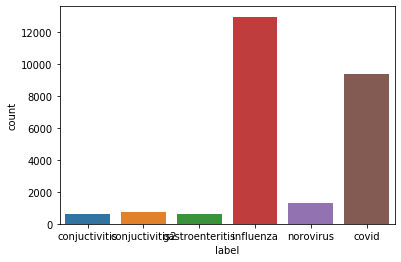

In [54]:
sns.countplot(x='label',data=collectedData)

In [55]:
from wordcloud import WordCloud, ImageColorGenerator

In [56]:
unique_string=(" ").join(collectedData['text'])
wordcloud = WordCloud(width = 1000, height = 500, background_color="white").generate(unique_string)


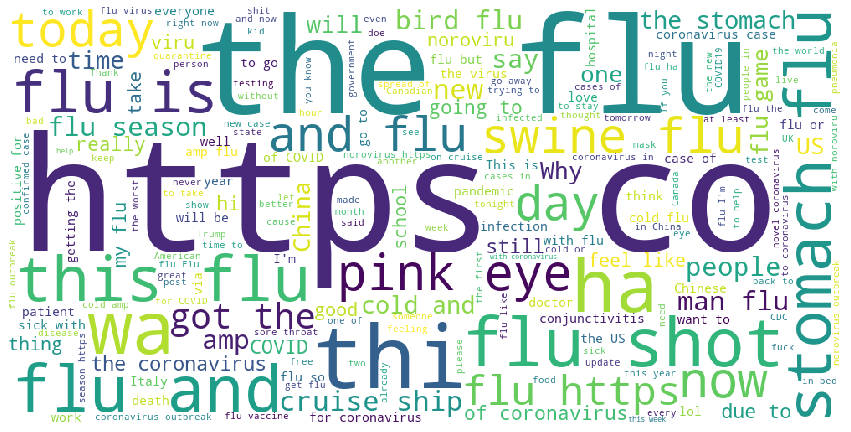

In [58]:
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("WordCloud_CollectedData"+".png", bbox_inches='tight')
plt.show()
plt.close()

## Data Preprocessing:

<b> preprocess_text:</b> function that remove special characters , HTML tags from the string  and multiple spaces , make sentence to lower case then stemming this sentence <br/>
<b> stemming_text: </b> function that takes a text string as a parameter then make it as a sequence of word then stemming those words then return stemmed words as text string 
<br/>
> `example of stemming` : text before stemming "connect connected connection connections connects" <br/>
                                after: "connect connect connect connect connect" 
                                
<b> stops_words: </b> function that lowercase everything and filter tokens to only keep the tokens that aren't in a list of Stop Words. this function use : <br/>
<ul>
    <li> <b> NLTK</b>  to make tokens out of the words in the input sentence using </li>
    <li> <b>lambda</b> to make a quick throwaway function and only assign the words to our variable if they aren't in a list of Stop Words provided by NLTK.</li>
</ul>
<b> lemmatize: </b> function for Lemmatization which considers the context and converts the word to its meaningful base form 

> ` example to explain the difference between stemming and lemmatization` : lemmatization would correctly identify the base form of ‘caring’ to ‘care’, whereas, stemming would cutoff the ‘ing’ part and convert it to car. <br/>
+ ‘Caring’ -> Lemmatization -> ‘Care’ 
+ ‘Caring’ -> Stemming -> ‘Car’ 

__cleaning_tweets__: function that remove retweet keyword "RT" , hyperlinks ,stock market tickers , hashtags (remove only # ), and predefined emoticons.

In [59]:
# Happy Emoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])
 
# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])
 
# all emoticons (happy + sad)
emoticons = emoticons_happy.union(emoticons_sad)


In [60]:
def cleaning_tweets(text):
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', text)
 
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
 
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
 
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
 
    tweets_clean = []    
    for word in tweet_tokens:
        if (word not in emoticons and # remove emoticons
                word not in string.punctuation): # remove punctuation
            tweets_clean.append(word)
 
    return tweets_clean
 

In [61]:
def stemming_text(text):
    porter_stemmer=PorterStemmer()
    # init stemmer
    sentm = keras.preprocessing.text.text_to_word_sequence(text, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ')
    
    #sentm is sequence of words of the input text
    sent=[porter_stemmer.stem(word=word) for word in sentm]
    
    #stemming each word in that sequence and store them in sent ( another sequence of stemmed words)
    sentSRT=" "
    sentSRT=sentSRT.join(sent)
    # join the sequence of stemmed word to full sentence
    return sentSRT

def lemmatize(text):
    # Init the Wordnet Lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    sentm = keras.preprocessing.text.text_to_word_sequence(text, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ')
    # Lemmatize list of words of sentence and join
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in sentm])

    return lemmatized_output

def stops_words(input):
    # lowercase everything to standardize it
    input = input.lower()

    # instantiate the tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(input)

    # if the created token isn't in the stop words, make it part of "filtered"
    filtered = filter(lambda token: token not in stopwords.words('english'), tokens)
    return " ".join(filtered)


In [62]:
# remove_tags function: replaces anything between opening and closing <> with an empty space.
def remove_tags(text):
    TAG_RE = re.compile(r'<[^>]+>')
    return TAG_RE.sub('', text)

def preprocess_text(sen):
    # Removing html tags with another function 
    sentence = remove_tags(sen)
    
    sentence = " ".join(cleaning_tweets(sentence))
    
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    
    #Remove stop words
    sentence=stops_words(sentence)
        
    #lemmatize sentence
    sentence = lemmatize(sentence)
    
    #stemming text
    sentence= stemming_text(sentence)
    
    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    
    return sentence

+ __for "text" column__

In [63]:
X = []
sentences = list(collectedData['text'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [64]:
# print line n 4
X[3]

'streptococcu pneumonia diseas caus comp conjunct otiti medium mening pneumonia sinus'

In [65]:
y = collectedData['label']

<b>divide our dataset into train and test sets :</b> <br/>
+ <b> The train set :</b> to train our deep learning models <br/>
+ <b> The test set : </b> to evaluate how well our model performs



In [66]:
y = pd.get_dummies(collectedData['label']).values
print('Shape of label tensor:', y.shape)

Shape of label tensor: (25603, 6)


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Preparing the Embedding Layer :

In [68]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [69]:
vocab_size = len(tokenizer.word_index) + 1
# Adding 1 because of reserved 0 index
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [70]:
embeddings_dictionary = dict()
glove_file = open('D:/Ds/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

## 1. With a Convolutional Neural Network (CNN)

In [126]:
CNNmodel = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
CNNmodel.add(embedding_layer)
CNNmodel.add(Conv1D(64, 5, activation='relu'))
CNNmodel.add(GlobalMaxPooling1D())
CNNmodel.add(Dropout(0.2))

# 6 : le nombre de classes 
CNNmodel.add(Dense(6, activation='softplus'))
CNNmodel.compile(optimizer='Adamax', loss='categorical_crossentropy', metrics=['acc',keras.metrics.Precision(),
                                                                     keras.metrics.Recall(),keras.metrics.AUC(curve="ROC")])
print(CNNmodel.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1166000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 96, 64)            32064     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 390       
Total params: 1,198,454
Trainable params: 32,454
Non-trainable params: 1,166,000
_________________________________________________________________
None


In [127]:
early_stopping = EarlyStopping(monitor='val_loss',min_delta=0, patience=20, verbose=0, mode='auto')
checkpointer = ModelCheckpoint(filepath='keras_weights.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

history = CNNmodel.fit(X_train, y_train, batch_size=128, epochs=15, verbose=1, validation_split=0.2 , callbacks=[early_stopping, checkpointer])


Train on 14337 samples, validate on 3585 samples
Epoch 1/15
14337/14337 [==============================] - 4s 276us/step - loss: 0.6785 - acc: 0.7974 - precision_3: 0.5122 - recall_3: 0.9060 - auc_3: 0.8934 - val_loss: 0.3852 - val_acc: 0.8803 - val_precision_3: 0.7829 - val_recall_3: 0.9105 - val_auc_3: 0.9699

Epoch 00001: val_acc improved from -inf to 0.88033, saving model to keras_weights.hdf5
Epoch 2/15
14337/14337 [==============================] - 3s 242us/step - loss: 0.3706 - acc: 0.8903 - precision_3: 0.7912 - recall_3: 0.8632 - auc_3: 0.9692 - val_loss: 0.2961 - val_acc: 0.9166 - val_precision_3: 0.8504 - val_recall_3: 0.8801 - val_auc_3: 0.9810

Epoch 00002: val_acc improved from 0.88033 to 0.91660, saving model to keras_weights.hdf5
Epoch 3/15
14337/14337 [==============================] - 3s 240us/step - loss: 0.2967 - acc: 0.9138 - precision_3: 0.8416 - recall_3: 0.8078 - auc_3: 0.9751 - val_loss: 0.2565 - val_acc: 0.9269 - val_precision_3: 0.8814 - val_recall_3: 0.8229 

In [97]:
print(CNNmodel.metrics_names)

['loss', 'acc', 'precision_8', 'recall_8', 'auc_8']


In [128]:
score = CNNmodel.evaluate(X_test, y_test, verbose=1)
print("loss score:", score[0])
print("Accuracy score:", score[1])
print("precision score:", score[2])
print("recall score:", score[3])
print("AUC with curve ROC score:", score[4])

7681/7681 [==============================] - 1s 110us/step
loss score: 0.19945339861538955
Accuracy score: 0.9398515820503235
precision score: 0.9485095143318176
recall score: 0.5923708081245422
AUC with curve ROC score: 0.9810656309127808


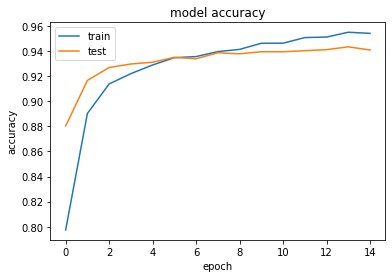

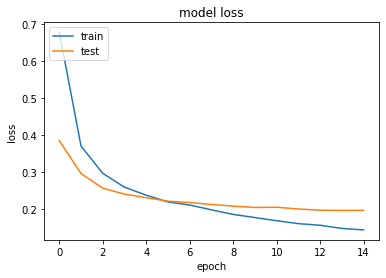

In [129]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()


### - Evaluate CNN Model with Kfold Cross Validation

In [54]:
def create_model(): 
    model4 = Sequential()
    embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
    model4.add(embedding_layer)
    model4.add(Conv1D(64, 5, activation='relu'))
    model4.add(GlobalMaxPooling1D())
    model4.add(Dropout(0.2))
    model4.add(Dense(6, activation='softplus'))
    model4.compile(optimizer='Adamax', loss='categorical_crossentropy', metrics=['acc',keras.metrics.Precision(),
                                                                     keras.metrics.Recall(),keras.metrics.AUC(curve="ROC")])
    return model4

In [55]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.utils.multiclass import type_of_target

In [59]:
type_of_target(y)

'multilabel-indicator'

In [58]:
type_of_target(y_train)

'multilabel-indicator'

In [60]:
seed = 7
model4 = KerasClassifier(build_fn=create_model, epochs=10, batch_size=128, verbose=1)
# evaluate using 3-fold cross validation
kfold = KFold(n_splits=3, shuffle=True, random_state=seed)
results = cross_val_score(model4,X_train,y_train, cv=kfold)
print(results.mean())

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/10
11948/11948 [==============================] - 3s 218us/step - loss: 0.7386 - acc: 0.7762 - precision_1: 0.4180 - recall_1: 0.9386 - auc_1: 0.8509
Epoch 2/10
11948/11948 [==============================] - 2s 201us/step - loss: 0.4090 - acc: 0.8728 - precision_1: 0.7229 - recall_1: 0.9297 - auc_1: 0.9602
Epoch 3/10
11948/11948 [==============================] - 4s 295us/step - loss: 0.3158 - acc: 0.9068 - precision_1: 0.8093 - recall_1: 0.9110 - auc_1: 0.9741
Epoch 4/10
11948/11948 [==============================] - 4s 295us/step - loss: 0.2710 - acc: 0.9195 - precision_1: 0.8561 - recall_1: 0.8815 - auc_1: 0.9798
Epoch 5/10
11948/11948 [==============================] - 4s 297us/step - loss: 0.2424 - acc: 0.9271 - precision_1: 0.8922 - recall_1: 0.8613 - auc_1: 0.9825
Epoch 6/10
11948/11948 [==============================] - 3s 230us/step - loss: 0.2237 - acc: 0.9309 - precision_1:

----------------------

## 2. With a Recurrent Neural Network (LSTM)

In [83]:
LstmModel = models.Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
LstmModel.add(embedding_layer)
LstmModel.add(LSTM(units=50, return_sequences=True))
LstmModel.add(LSTM(units=50 , return_sequences=True))
LstmModel.add(LSTM(units=50 , return_sequences=True))
LstmModel.add(LSTM(units=50))
LstmModel.add(Dropout(0.25))

LstmModel.add(Dense(6, activation='softplus'))
LstmModel.compile(optimizer='Adamax', loss='categorical_crossentropy',  metrics=['acc',keras.metrics.Precision(),
                                                                     keras.metrics.Recall(),keras.metrics.AUC(curve="ROC")])
print(LstmModel.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 100, 100)          1166000   
_________________________________________________________________
lstm_9 (LSTM)                (None, 100, 50)           30200     
_________________________________________________________________
lstm_10 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_11 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_12 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dropout_7 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 6)                

In [84]:
history = LstmModel.fit(X_train, y_train, batch_size=128, epochs=15, verbose=1, validation_split=0.2 )

Train on 14337 samples, validate on 3585 samples
Epoch 1/15
14337/14337 [==============================] - 73s 5ms/step - loss: 1.2068 - acc: 0.4963 - precision_6: 0.3775 - recall_6: 0.8809 - auc_6: 0.7408 - val_loss: 1.1424 - val_acc: 0.4976 - val_precision_6: 0.4382 - val_recall_6: 0.8764 - val_auc_6: 0.7326
Epoch 2/15
14337/14337 [==============================] - 64s 4ms/step - loss: 1.1657 - acc: 0.5043 - precision_6: 0.4275 - recall_6: 0.8701 - auc_6: 0.7288 - val_loss: 1.1369 - val_acc: 0.4976 - val_precision_6: 0.4382 - val_recall_6: 0.8764 - val_auc_6: 0.7306
Epoch 3/15
14337/14337 [==============================] - 51s 4ms/step - loss: 0.9095 - acc: 0.7203 - precision_6: 0.4722 - recall_6: 0.8652 - auc_6: 0.8189 - val_loss: 0.7333 - val_acc: 0.8201 - val_precision_6: 0.8179 - val_recall_6: 0.8218 - val_auc_6: 0.9074
Epoch 4/15
14337/14337 [==============================] - 50s 4ms/step - loss: 0.6969 - acc: 0.8213 - precision_6: 0.6174 - recall_6: 0.8548 - auc_6: 0.9154 - val

In [85]:
score = LstmModel.evaluate(X_test, y_test, verbose=1)
print("loss score:", score[0])
print("Accuracy score:", score[1])
print("precision score:", score[2])
print("recall score:", score[3])
print("AUC with curve ROC score:", score[4])

7681/7681 [==============================] - 9s 1ms/step
loss score: 0.4471049581900144
Accuracy score: 0.8597838878631592
precision score: 0.656358003616333
recall score: 0.9394609928131104
AUC with curve ROC score: 0.9362887740135193


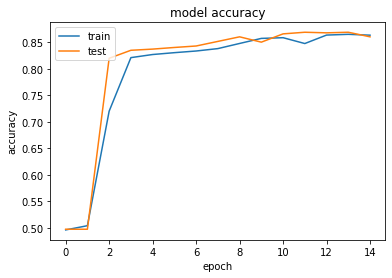

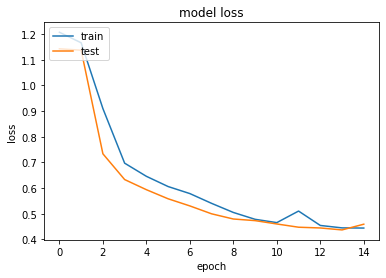

In [86]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

### - Evaluate LSTM Model with Kfold Cross Validation

In [61]:
def create_modelLSTM(): 
    modelLSTM = Sequential()
    embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
    modelLSTM.add(embedding_layer)
    modelLSTM.add(LSTM(units=50, return_sequences=True))
    modelLSTM.add(LSTM(units=50, return_sequences=True))
    modelLSTM.add(LSTM(units=50, return_sequences=True))
    modelLSTM.add(LSTM(units=50))
    modelLSTM.add(Dropout(0.25))
    

    modelLSTM.add(Dense(6, activation='softplus'))
    modelLSTM.compile(optimizer='Adamax', loss='categorical_crossentropy', metrics=['acc',keras.metrics.Precision(),
                                                                     keras.metrics.Recall(),keras.metrics.AUC(curve="ROC")])
    return modelLSTM

In [62]:
type_of_target(y) 

'multilabel-indicator'

In [63]:
type_of_target(y_train)

'multilabel-indicator'

In [65]:
seed = 7
modelLSTM = KerasClassifier(build_fn=create_modelLSTM, epochs=10, batch_size=128, verbose=1)
# evaluate using 3-fold cross validation
kfold = KFold(n_splits=3, shuffle=True, random_state=seed)
results = cross_val_score(modelLSTM,X_train,y_train, cv=kfold)
print(results.mean())

Epoch 1/10
11948/11948 [==============================] - 38s 3ms/step - loss: 1.2234 - acc: 0.4930 - precision_4: 0.3506 - recall_4: 0.8899 - auc_4: 0.7420
Epoch 2/10
11948/11948 [==============================] - 40s 3ms/step - loss: 1.1645 - acc: 0.4974 - precision_4: 0.4207 - recall_4: 0.8760 - auc_4: 0.7294
Epoch 3/10
11948/11948 [==============================] - 40s 3ms/step - loss: 1.1600 - acc: 0.4992 - precision_4: 0.4188 - recall_4: 0.8768 - auc_4: 0.7303
Epoch 4/10
11948/11948 [==============================] - 39s 3ms/step - loss: 1.1595 - acc: 0.5016 - precision_4: 0.4201 - recall_4: 0.8785 - auc_4: 0.7302
Epoch 5/10
11948/11948 [==============================] - 36s 3ms/step - loss: 1.1596 - acc: 0.5013 - precision_4: 0.4200 - recall_4: 0.8752 - auc_4: 0.7302
Epoch 6/10
11948/11948 [==============================] - 37s 3ms/step - loss: 1.1593 - acc: 0.5020 - precision_4: 0.4200 - recall_4: 0.8756 - auc_4: 0.7298
Epoch 7/10
11948/11948 [==============================] - 

## 3. With a Bidirectional LSTM

In [59]:
BLSTMmodel = models.Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
BLSTMmodel.add(embedding_layer)
BLSTMmodel.add(Bidirectional(LSTM(units=50 , return_sequences=True)))
BLSTMmodel.add(Bidirectional(LSTM(units=50 , return_sequences=True)))
BLSTMmodel.add(Bidirectional(LSTM(units=50 , return_sequences=True)))
BLSTMmodel.add(Bidirectional(LSTM(units=50)))
BLSTMmodel.add(Dropout(0.25))

BLSTMmodel.add(Dense(6, activation='softplus'))
BLSTMmodel.compile(optimizer='Adadelta', loss='categorical_crossentropy',  metrics=['acc',keras.metrics.Precision(),
                                                                     keras.metrics.Recall(),keras.metrics.AUC(curve="ROC")])
print(BLSTMmodel.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1166000   
_________________________________________________________________
bidirectional_5 (Bidirection (None, 100, 100)          60400     
_________________________________________________________________
bidirectional_6 (Bidirection (None, 100, 100)          60400     
_________________________________________________________________
bidirectional_7 (Bidirection (None, 100, 100)          60400     
_________________________________________________________________
bidirectional_8 (Bidirection (None, 100)               60400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                

In [60]:
history = BLSTMmodel.fit(X_train, y_train, batch_size=128, epochs=15, verbose=1, validation_split=0.2 )

Train on 14337 samples, validate on 3585 samples
Epoch 1/15
14337/14337 [==============================] - 333s 23ms/step - loss: 0.8326 - acc: 0.7171 - precision_2: 0.5072 - recall_2: 0.8707 - auc_2: 0.8737 - val_loss: 0.5433 - val_acc: 0.8318 - val_precision_2: 0.8040 - val_recall_2: 0.8510 - val_auc_2: 0.9516
Epoch 2/15
14337/14337 [==============================] - 206s 14ms/step - loss: 0.4368 - acc: 0.8597 - precision_2: 0.8018 - recall_2: 0.8982 - auc_2: 0.9642 - val_loss: 0.3577 - val_acc: 0.8901 - val_precision_2: 0.8498 - val_recall_2: 0.9199 - val_auc_2: 0.9714
Epoch 3/15
14337/14337 [==============================] - 152s 11ms/step - loss: 0.3443 - acc: 0.8879 - precision_2: 0.8501 - recall_2: 0.9116 - auc_2: 0.9740 - val_loss: 0.3041 - val_acc: 0.9160 - val_precision_2: 0.8789 - val_recall_2: 0.9291 - val_auc_2: 0.9777
Epoch 4/15
14337/14337 [==============================] - 149s 10ms/step - loss: 0.2897 - acc: 0.9086 - precision_2: 0.8902 - recall_2: 0.9086 - auc_2: 0.98

In [61]:
score = BLSTMmodel.evaluate(X_test, y_test, verbose=1)
print("loss score:", score[0])
print("Accuracy score:", score[1])
print("precision score:", score[2])
print("recall score:", score[3])
print("AUC with curve ROC score:", score[4])

7681/7681 [==============================] - 14s 2ms/step
loss score: 0.20461143667462525
Accuracy score: 0.9373779296875
precision score: 0.9801508188247681
recall score: 0.8293191194534302
AUC with curve ROC score: 0.9908621907234192


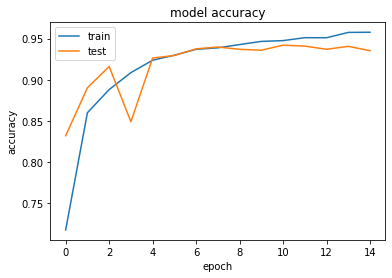

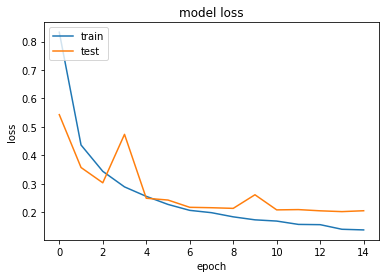

In [62]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

### - Evaluate BiLSTM Model Kfold with Cross Validation

In [66]:
def create_modelBLSTM(): 
    modelBLSTM = Sequential()
    embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
    modelBLSTM.add(embedding_layer)
    modelBLSTM.add(Bidirectional(LSTM(units=50, return_sequences=True)))
    modelBLSTM.add(Bidirectional(LSTM(units=50, return_sequences=True)))
    modelBLSTM.add(Bidirectional(LSTM(units=50, return_sequences=True)))
    modelBLSTM.add(Bidirectional(LSTM(units=50)))
    modelBLSTM.add(Dropout(0.25))
    

    modelBLSTM.add(Dense(6, activation='softplus'))
    modelBLSTM.compile(optimizer='Adadelta', loss='categorical_crossentropy', metrics=['acc',keras.metrics.Precision(),
                                                                     keras.metrics.Recall(),keras.metrics.AUC(curve="ROC")])
    return modelBLSTM

In [67]:
seed = 7
modelBLSTM = KerasClassifier(build_fn=create_modelBLSTM, epochs=10, batch_size=128, verbose=1)
# evaluate using 3-fold cross validation
kfold = KFold(n_splits=3, shuffle=True, random_state=seed)
results = cross_val_score(modelBLSTM,X_train,y_train, cv=kfold)
print(results.mean())

Epoch 1/10
11948/11948 [==============================] - 136s 11ms/step - loss: 0.9021 - acc: 0.6861 - precision_7: 0.4593 - recall_7: 0.8807 - auc_7: 0.8518
Epoch 2/10
11948/11948 [==============================] - 138s 12ms/step - loss: 0.4525 - acc: 0.8561 - precision_7: 0.7924 - recall_7: 0.9007 - auc_7: 0.9592
Epoch 3/10
11948/11948 [==============================] - 138s 12ms/step - loss: 0.3542 - acc: 0.8878 - precision_7: 0.8400 - recall_7: 0.9156 - auc_7: 0.9711
Epoch 4/10
11948/11948 [==============================] - 140s 12ms/step - loss: 0.2929 - acc: 0.9164 - precision_7: 0.9000 - recall_7: 0.9095 - auc_7: 0.9824
Epoch 5/10
11948/11948 [==============================] - 249s 21ms/step - loss: 0.2585 - acc: 0.9254 - precision_7: 0.9429 - recall_7: 0.8822 - auc_7: 0.9871
Epoch 6/10
11948/11948 [==============================] - 139s 12ms/step - loss: 0.2373 - acc: 0.9310 - precision_7: 0.9621 - recall_7: 0.8694 - auc_7: 0.9887
Epoch 7/10
11948/11948 [======================

# Evaluation

|Critères d'évaluation (metrics) || cnn | lstm | bilstm  ||the model with highest score |
| ------:|| -----------:| -----------:| -----------:|| -----------:|
| __acc__   || 0.9398515820503235  |0.8597838878631592 | 0.9373779296875  ||CNN  |
| ||| ||||
| __precision__ || 0.9485095143318176 |0.656358003616333  |0.9801508188247681  ||BiLSTM |
|| || ||||
| __recall__   || 0.5923708081245422 | 0.9394609928131104  |0.8293191194534302 ||LSTM |
| ||| ||||
| __auc with curve 'ROC'__   || 0.9810656309127808 |0.9362887740135193  |0.9908621907234192  ||BiLSTM |
| __KFOlds validation acc__   ||0.9364468256632487 |0.738533635934194  |0.9364468256632487  || CNN & BiLSTM |
| __Run time__  ||+ | ++ |++++ || CNN  |





so both CNN and BLSTM models have high scores but BLSTM have highest score then cnn in 
+ precision
+ recall 
+ auc with curve 'ROC'